# Exploratory Data Analysis
This Notebook demonstrates the exploratory data analysis (EDA) of the analysis dataset to uncover insights. The notebook also showcases various visualizations representing the data graphically, making it easier to understand the data and its features.

## Table of Contents

1. [Data Load and Preprocess](#data-load-and-preprocess)
2. [Data Exploration (EDA)](#data-exploration-eda)
3. [Visualizing Continuous Variables: Histograms and Box Plots](#visualizing-continuous-variables-histograms-and-box-plots)
4. [Exploring Interaction Effects Between Treatment (Z) and School-Level Covariates (X1 to X5)](#exploring-interaction-effects-between-treatment-z-and-school-level-covariates-x1-to-x5)
5. [Visualizing Categorical Variables: Count Plots](#visualizing-categorical-variables-count-plots)
6. [Correlation Matrix for Continuous Variables](#correlation-matrix-for-continuous-variables)
7. [Data Distribution Across All Features](#data-distribution-across-all-features)


## Data Load and Preprocess
The dataset used emulates an observational study, mirroring the characteristics of the National Study, including covariate distributions, data structures, and effect sizes. It consists of approximately 10,000 students from 76 schools. The variables include a simulated continuous outcome measure of student achievement (Y) and a binary treatment variable (Z) indicating whether a student received the growth mindset intervention.

Additionally, the dataset comprises ten covariates at both the student and school levels:

Student-Level Variables:
* S3: Students' self-reported expectations for future success, serving as a proxy for prior achievement.
* C1: Categorical variable indicating student race/ethnicity.
* C2: Categorical variable for student-identified gender.
* C3: Categorical variable for whether the student is the first in their family to potentially attend college (first-generation status).

School-Level Variables:
* XC: Categorical variable representing the urbanicity of the school (e.g., rural, suburban).
* X1: Average level of fixed mindset among students, measured before the intervention.
* X2: School achievement level, based on test scores and college preparation data from previous cohorts.
* X3: Racial/ethnic minority composition of the school.
* X4: Poverty concentration, measured as the percentage of students from families below the federal poverty line.
* X5: Total student population across all grade levels in the school.


In [1]:
import pandas as pd

# Load the dataset
dataset = pd.read_csv('../../data/analysis_data/dataset.csv')
print(dataset.head())

   schoolid  Z         Y  S3  C1  C2  C3  XC        X1        X2        X3  \
0        76  1  0.081602   6   4   2   1   4  0.334544  0.648586 -1.310927   
1        76  1 -0.385869   4  12   2   1   4  0.334544  0.648586 -1.310927   
2        76  1  0.398184   6   4   2   0   4  0.334544  0.648586 -1.310927   
3        76  1 -0.175037   6   4   2   0   4  0.334544  0.648586 -1.310927   
4        76  1  0.884583   6   4   1   0   4  0.334544  0.648586 -1.310927   

         X4        X5  
0  0.224077 -0.426757  
1  0.224077 -0.426757  
2  0.224077 -0.426757  
3  0.224077 -0.426757  
4  0.224077 -0.426757  


Interpretation of DataSet structure
* Dataset Overview:

    The dataset contains 10,391 rows (representing individual students or observations) and 13 columns (representing variables such as school-level covariates, student-level covariates, treatment, and outcomes).
    All variables have non-null values, meaning there are no missing data points in this dataset,No need to handle missing values here.

* Data Types:
    - int64: Used for categorical and binary variables such as schoolid, Z (treatment indicator), and categorical covariates like C1, C2, C3, S3, and XC.
    - float64: Used for continuous numerical variables such as the outcome variable (Y), and the school-level variables (X1, X2, X3, X4, X5).
    - Categorical variables: Currently stored as int64 (especially for the variables C1, C2, C3, XC). 
    - Continuous variables: Variables like Y, X1 to X5 are already in the right format and can be directly used in models. However, might have to normalize or standardize these features depending on the models being used (e.g., linear regression or neural networks might require feature scaling).


## Data Exploration (EDA)
 Exploratory data analysis (EDA) to understand the distributions of variables and relationships between them.

Visualizing Continuous Variables: Histograms and Box Plots:

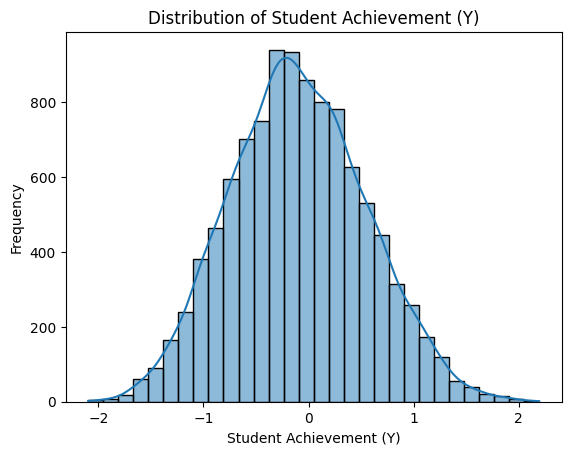

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt

# Histogram for Student Achievement (Y)
sns.histplot(dataset['Y'], bins=30, kde=True)
plt.title("Distribution of Student Achievement (Y)")
plt.xlabel("Student Achievement (Y)")
plt.ylabel("Frequency")
plt.show()


Histogram of Student Achievement (Y):

Symmetrical Distribution: The histogram shows that the distribution of the student achievement outcome (Y) is approximately normal. The curve peaks near zero and tapers off symmetrically on both sides, indicating that the majority of students have a student achievement score close to the mean (0).

KDE Plot: The Kernel Density Estimation (KDE) plot overlaid on the histogram confirms the normal distribution pattern. The smooth curve follows the histogram bars closely, showing that the dataset doesn't have heavy skewness or irregular distributions.

No Outliers: There are no significant outliers or extreme values in this distribution, as the bulk of the data is concentrated between -2 and 2.

This normal distribution of Y suggests that models can likely assume normality for the outcome variable, making statistical tests and linear models  more reliable.

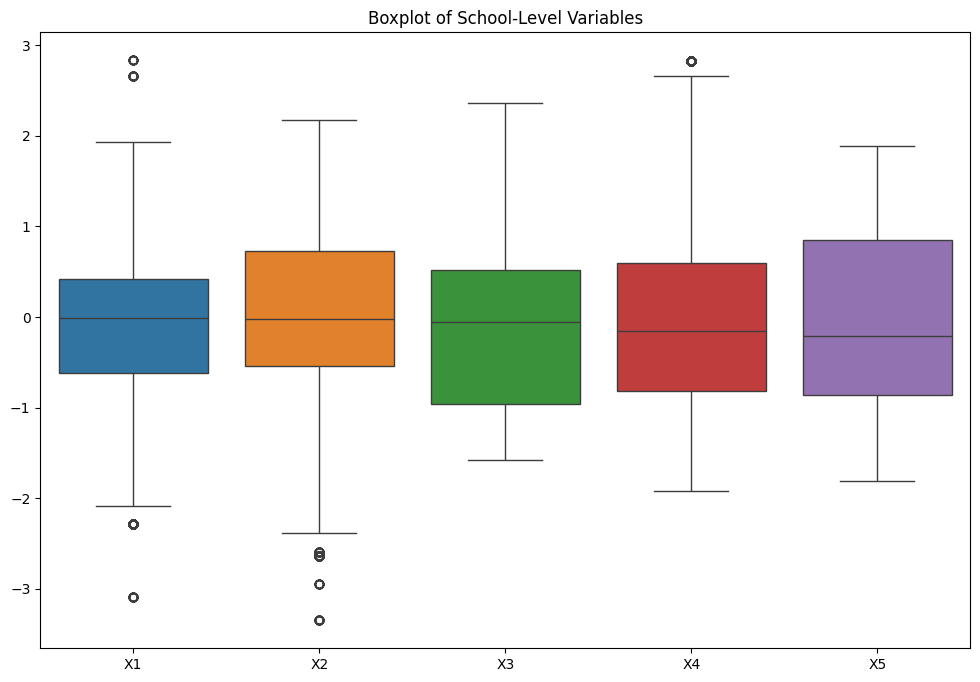

In [3]:
# Box plot for School-Level Variables
plt.figure(figsize=(12, 8))
sns.boxplot(data=dataset[['X1', 'X2', 'X3', 'X4', 'X5']])
plt.title("Boxplot of School-Level Variables")
plt.show()

Boxplot of School-Level Variables (X1 to X5):

The boxplots display the distribution of the school-level covariates (X1, X2, X3, X4, and X5).

X1 (Fixed Mindset): The boxplot shows a relatively compact distribution, with no extreme outliers. The range spans approximately from -1.5 to 2. There are a couple of minor outliers on the lower end, but nothing particularly extreme.

X2 (School Achievement Level): This variable exhibits a wider range, with some noticeable outliers on the lower end (below -2). Most of the data, however, lies within a reasonable range centered around 0.

X3 (Racial/Ethnic Minority Composition): The distribution of X3 seems fairly balanced, with no extreme outliers. The data ranges from -2 to around 1.5.

X4 (Poverty Concentration): X4 shows a similar pattern to X3, with a few outliers on the lower end and most data points centered around 0.

X5 (Total Student Population): This variable appears to be the most symmetric, with the interquartile range (IQR) between -1 and 1. There are no significant outliers.


## Exploring Interaction Effects Between treatment(Z) and School-Level Covariates (X1 to X5)
Interaction effects occur when the effect of one variable (e.g., the treatment Z) on the outcome Y depends on the level of another variable (e.g., school-level covariates). To explore these effects, we can add interaction terms to a regression model.

* Preparing Interaction Terms: Creating interaction terms between the binary treatment variable (Z) and each school-level covariate (X1, X2, ..., X5)
* Using a linear regression model to assess the interaction effects.
* Examining the coefficients or feature importance of the interaction terms to understand how the treatment's effect on Y changes based on school-level covariates.


In [4]:
import statsmodels.api as sm

# Create interaction terms between treatment(Z) and school-level covariates (X1 to X5)
dataset['Z_X1'] = dataset['Z'] * dataset['X1']
dataset['Z_X2'] = dataset['Z'] * dataset['X2']
dataset['Z_X3'] = dataset['Z'] * dataset['X3']
dataset['Z_X4'] = dataset['Z'] * dataset['X4']
dataset['Z_X5'] = dataset['Z'] * dataset['X5']

# Define independent variables and dependent variable (Y)
X = dataset[['Z', 'X1', 'X2', 'X3', 'X4', 'X5', 'Z_X1', 'Z_X2', 'Z_X3', 'Z_X4', 'Z_X5']]
Y = dataset['Y']

# Add constant term for the regression model
X = sm.add_constant(X)

# Fit a linear regression model with interaction terms
model = sm.OLS(Y, X).fit()

# Summary of the regression model
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.068
Model:                            OLS   Adj. R-squared:                  0.067
Method:                 Least Squares   F-statistic:                     68.77
Date:                Mon, 13 Jan 2025   Prob (F-statistic):          1.55e-149
Time:                        21:54:34   Log-Likelihood:                -9789.5
No. Observations:               10391   AIC:                         1.960e+04
Df Residuals:                   10379   BIC:                         1.969e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1913      0.007    -25.638      0.0

Interpretation of the OLS Regression Results:
 * Ordinary Least Squares (OLS) regression model that includes interaction terms between the treatment variable (Z) and the school-level covariates (X1 to X5).
 * R-squared: 0.068: This means that only 6.8% of the variation in student achievement is explained by the model. This is low, suggesting that the model is not explaining much of the variance in student achievement
 * Adjusted R-squared: 0.067: Adjusted for the number of predictors, this value is similar to the R-squared, which indicates no overfitting
* F-statistic: 68.77 (p-value = 1.55e-149): The overall model is statistically significant because the p-value is very small (close to zero). This means that at least one of the predictors in the model has a significant effect on the outcome (Y).


Visualizing Categorical Variables: Count Plots:

Count plots to visualize the distribution of the treatment variable (Z), as well as other categorical variables like C1, C2, and C3

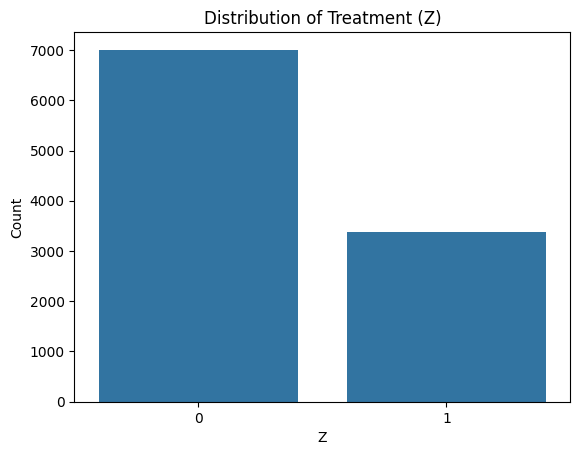

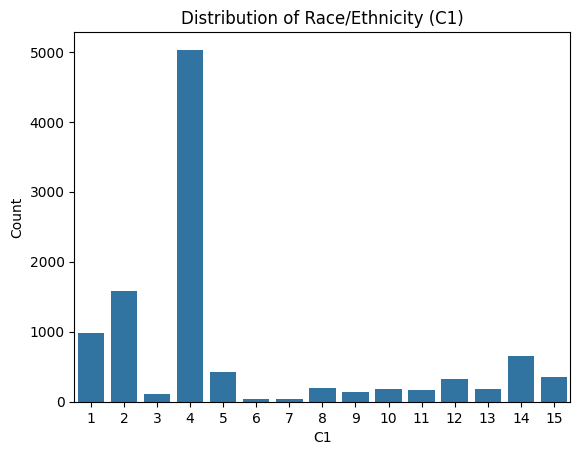

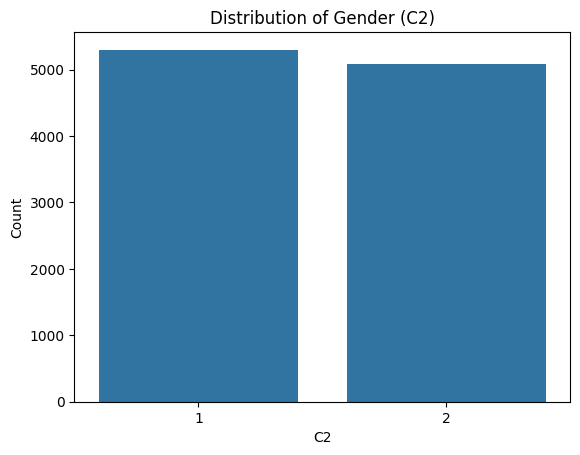

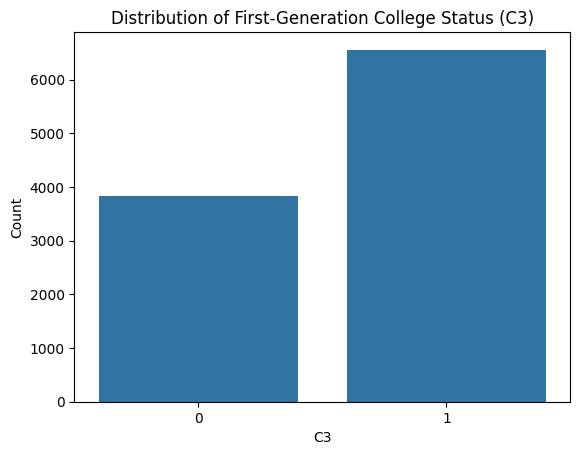

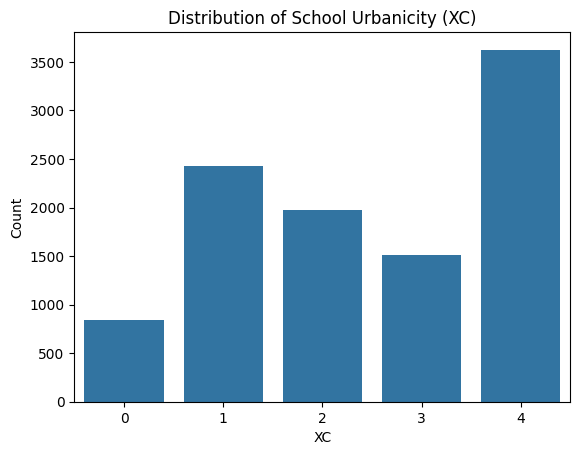

In [5]:
# List of categorical variables
categorical_vars = ['Z', 'C1', 'C2', 'C3', 'XC']
titles = {
    'Z': 'Distribution of Treatment (Z)',
    'C1': 'Distribution of Race/Ethnicity (C1)',
    'C2': 'Distribution of Gender (C2)',
    'C3': 'Distribution of First-Generation College Status (C3)',
    'XC': 'Distribution of School Urbanicity (XC)'
}

# Iterate over categorical variables and create count plots
for var in categorical_vars:
    sns.countplot(x=var, data=dataset)
    plt.title(titles[var])
    plt.xlabel(var)
    plt.ylabel("Count")
    plt.show()


Interpretation:
* Distribution of Treatment (Z)
    The majority of students (around 7,000) are in the control group (Z=0), while a smaller portion (around 3,000) are in the treatment group (Z=1). This shows an imbalance between the treatment and control groups, which should be considered when analyzing the effect of the intervention.
* Distribution of Race/Ethnicity (C1)
    Race/ethnicity group 4 dominates the dataset, with over 5,000 students, while other groups (like 1, 2, 5, etc.) have fewer students. Many race/ethnicity groups (e.g., 3, 7, 8, 9, etc.) have very small representations, which may affect statistical power when analyzing race-based effects. Imbalance in race/ethnicity distribution is evident, and care should be taken when conducting subgroup analysis.
* Distribution of Gender (C2)
    The distribution of gender is fairly balanced between the two categories, with each group containing around 5,000 students. This balance suggests that gender-related analyses can be conducted without much concern for imbalance between the two groups.
* Distribution of First-Generation College Status (C3)
    There are more first-generation college students (C3=1) than non-first-generation students, with around 6000 first-generation students and around 4,000 non-first-generation students.This suggests a higher proportion of students who are the first in their families to attend college, which might be a key demographic in the analysis.
* Distribution of School Urbanicity (XC)
    The distribution across urbanicity categories is more varied, with certain urbanicity groups having higher representation than others. Depending on the category definitions, this can affect analyses related to the impact of urban versus rural settings on student outcomes.

Correlation Matrix for Continuous Variables:

A correlation matrix to check how continuous variables relate to each other and to the outcome (Y).

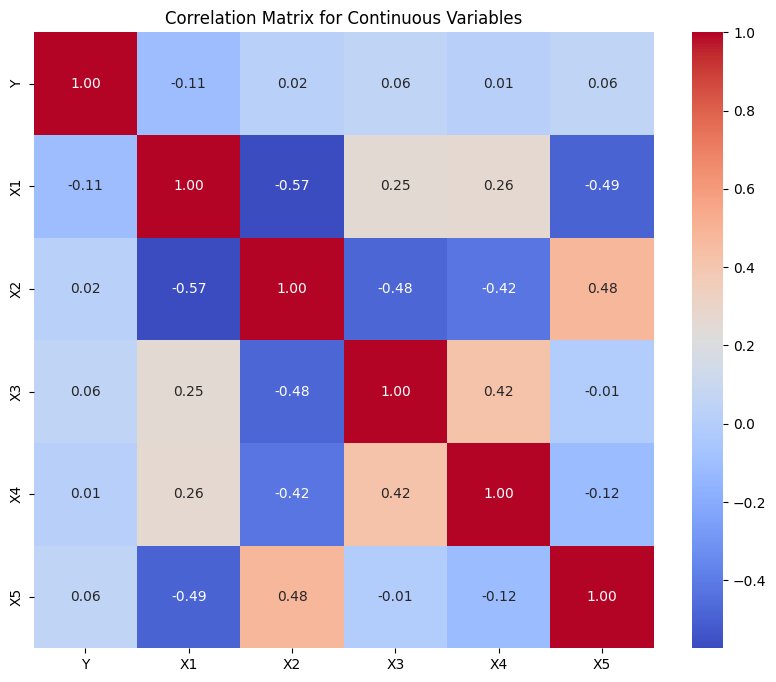

In [6]:
# Correlation matrix for continuous variables
corr_matrix = dataset[['Y', 'X1', 'X2', 'X3', 'X4', 'X5']].corr()

# Plot heatmap for correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Matrix for Continuous Variables")
plt.show()


Insights:
The correlation matrix heatmap generated shows the pairwise correlation between the continuous variables in the dataset
* Correlation of Y (Student Achievement) with Other Variables:

    * Y and X1: There is a negative correlation (-0.11) between student achievement and fixed mindset. This means that higher fixed mindset levels are slightly associated with lower student achievement.
    * Y and X2: A very weak positive correlation (0.02), suggesting that school achievement levels (from prior cohorts) have almost no linear relationship with current student achievement.
    * Y and X3: A positive correlation (0.06) with minority composition, but the correlation is weak. This indicates a slight association between minority composition and higher student achievement.
    * Y and X4: A very weak positive correlation (0.01) with poverty concentration. This suggests that poverty concentration at the school level has almost no linear effect on student achievement in this dataset
    * Y and X5: A positive correlation (0.06) with total student population, though it’s also weak. This shows a minimal association between school size and student achievement.

* Interrelationships Between the School-Level Covariates:

    * X1 and X2: A strong negative correlation (-0.57). This suggests that schools with a higher fixed mindset tend to have lower achievement levels from prior cohorts.
    * X1 and X3: A moderate positive correlation (0.25), indicating that schools with higher fixed mindset levels tend to have a larger minority composition.
    * X2 and X3: A moderate negative correlation (-0.48), showing that schools with higher prior achievement tend to have a lower minority composition.
    * X2 and X5: A moderate positive correlation (0.48), suggesting that larger schools (by total student population) tend to have higher achievement levels from previous cohorts.
    * X3 and X4: A moderate positive correlation (0.42), indicating that schools with a higher minority composition also tend to have higher poverty concentrations.
    * X4 and X5: A weak negative correlation (-0.12), suggesting that smaller schools tend to have higher poverty concentrations, though the relationship is weak.


## Data distribution acroos all the features

In [7]:
# Columns are renamed to more descriptive names for clarity.
data = dataset.rename(columns={
        'Y': 'StudentAchievementScore',
        'Z': 'GrowthMindsetIntervention',
        'S3': 'FutureSuccessExpectations',
        'C1': 'StudentRaceEthnicity',
        'C2': 'StudentGender',
        'C3': 'FirstGenCollegeStatus',
        'XC': 'SchoolUrbanicity',
        'X1': 'PreInterventionFixedMindset',
        'X2': 'SchoolAchievementLevel',
        'X3': 'SchoolMinorityComposition',
        'X4': 'PovertyConcentration',
        'X5': 'TotalStudentPopulation'
    })

                           FutureSuccessExpectations  StudentRaceEthnicity  \
GrowthMindsetIntervention                                                    
0                                           5.222349              5.241045   
1                                           5.362884              5.185875   

                           StudentGender  FirstGenCollegeStatus  \
GrowthMindsetIntervention                                         
0                               1.498787               0.646068   
1                               1.471631               0.599586   

                           SchoolUrbanicity  PreInterventionFixedMindset  \
GrowthMindsetIntervention                                                  
0                                  2.442272                    -0.009394   
1                                  2.459220                    -0.104777   

                           SchoolAchievementLevel  SchoolMinorityComposition  \
GrowthMindsetIntervention        

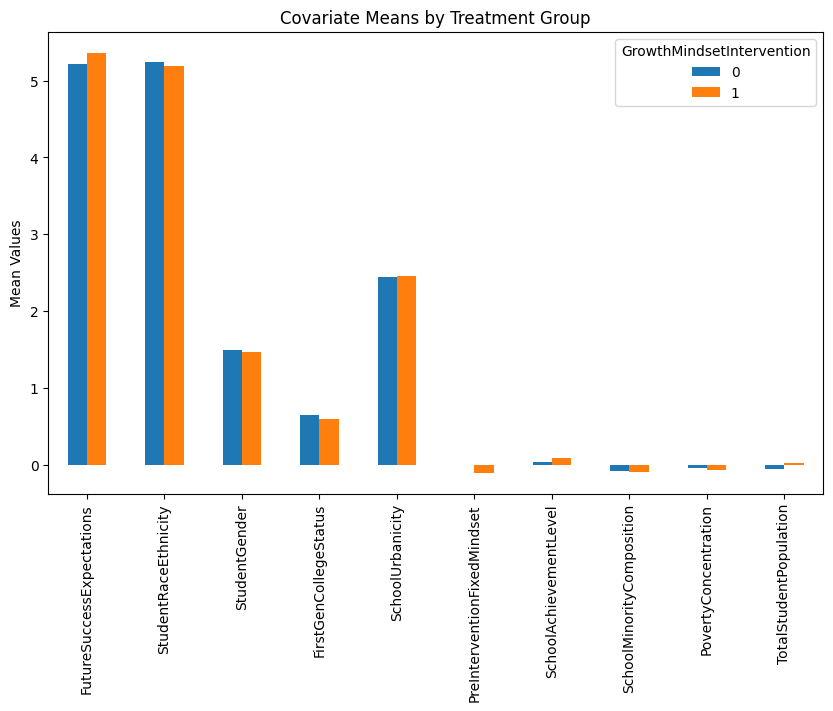

In [8]:
# Compare mean values of covariates between treatment and control groups
renamed_covariate_cols = [
    'FutureSuccessExpectations',
    'StudentRaceEthnicity',
    'StudentGender',
    'FirstGenCollegeStatus',
    'SchoolUrbanicity',
    'PreInterventionFixedMindset',
    'SchoolAchievementLevel',
    'SchoolMinorityComposition',
    'PovertyConcentration',
    'TotalStudentPopulation'
]

covariate_means = data.groupby('GrowthMindsetIntervention')[renamed_covariate_cols].mean()
print(covariate_means)

# Visualize covariate balance
covariate_means.T.plot(kind='bar', figsize=(10, 6))
plt.title('Covariate Means by Treatment Group')
plt.ylabel('Mean Values')
plt.show()
